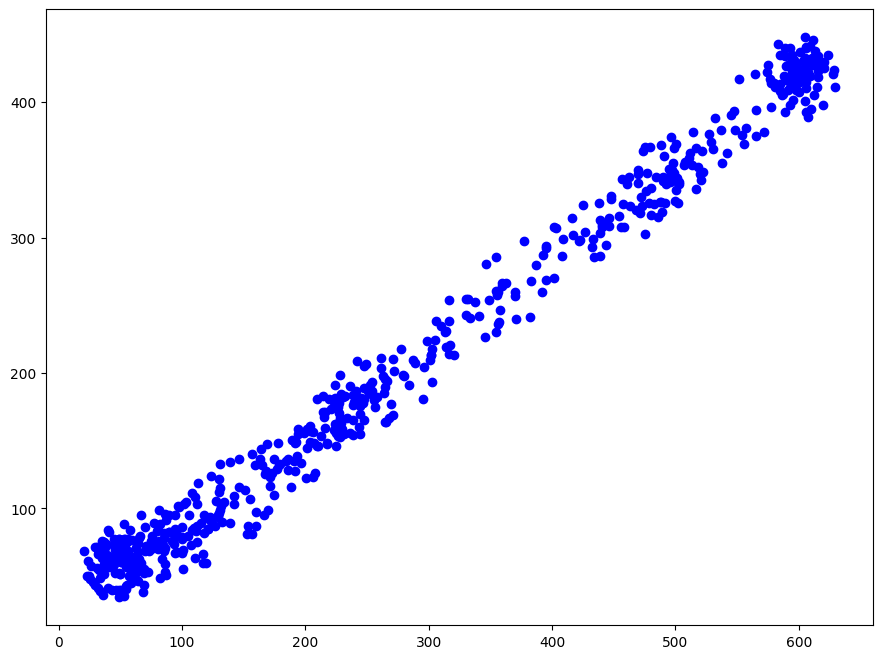

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pygame

points = {'data':np.empty((0,1), dtype='f'), 'targets':np.empty((0,), dtype='f')}
    
c_radius = 3
c_color = (0,0,255)
c_thickness = 0 
jet_radius = 30
jet_thr = .5

bg_color = (255,255,255)
(width,height) = (640,480)
screen = pygame.display.set_mode((width,height))
pygame.display.set_caption("data generator")

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing and np.random.uniform(0,1)>jet_thr:        
        (x, y) = pygame.mouse.get_pos()
        r = np.random.uniform(0,jet_radius)
        phi = np.random.uniform(0,2*np.pi)
        coord = [x+r*np.cos(phi), height-(y+r*np.sin(phi))]
        points['data'] = np.append(points['data'], [[coord[0]]], axis=0)
        points['targets'] = np.append(points['targets'], coord[1])
            
    screen.fill(bg_color)
    for X,y in zip(points['data'], points['targets']):
        pygame.draw.circle(screen,c_color,(int(X[0]),height-int(y)),c_radius,c_thickness)
    pygame.display.flip()
    
pygame.quit()

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(points['data'][:,0],points['targets'],c="blue")
plt.show()

In [39]:
X = points['data']
y = points['targets']

In [46]:
data_x = points['data']
data_y = points['targets']

0.9865409243403781
22.31143568261203 [0.65546278]
[22.63916707]


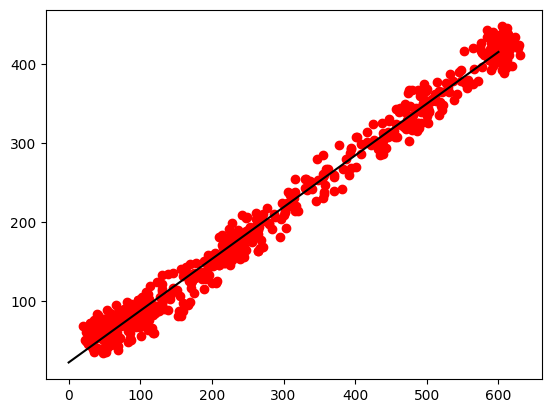

In [40]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.intercept_, reg.coef_)
print(reg.predict(np.array([[.5]])))

X_test = np.array([0, 600])
y_test = reg.intercept_ + reg.coef_[0]*X_test

plt.figure()
plt.scatter(X, y, c='red')
plt.plot(X_test, y_test, c='black')
plt.show()

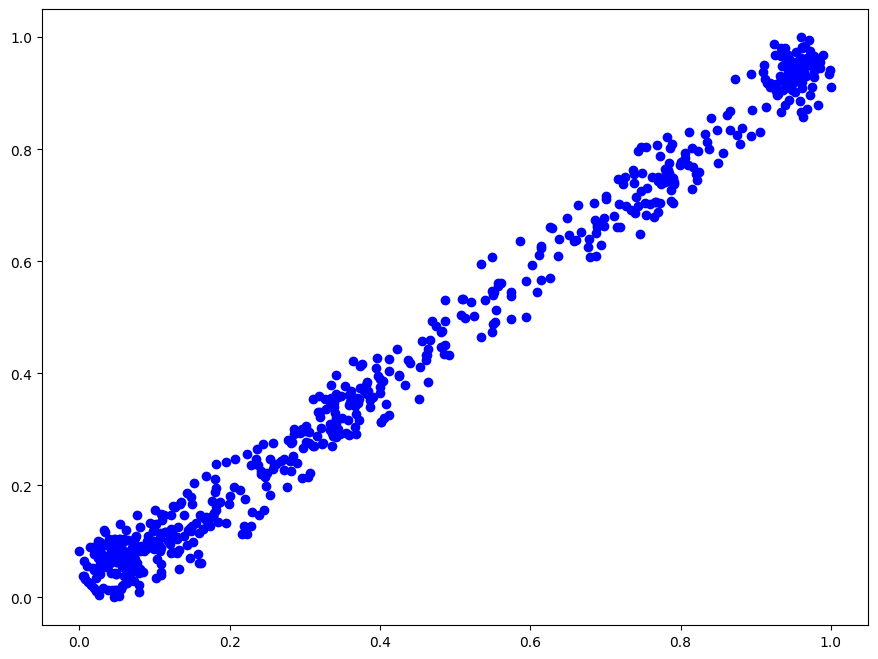

In [41]:
X_max, X_min = X.max(), X.min()
X_norm = (X - X_min) / (X_max - X_min)

y_max, y_min = y.max(), y.min()
y_norm = (y - y_min) / (y_max - y_min)

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(X_norm[:,0],y_norm,c="blue")
plt.show()

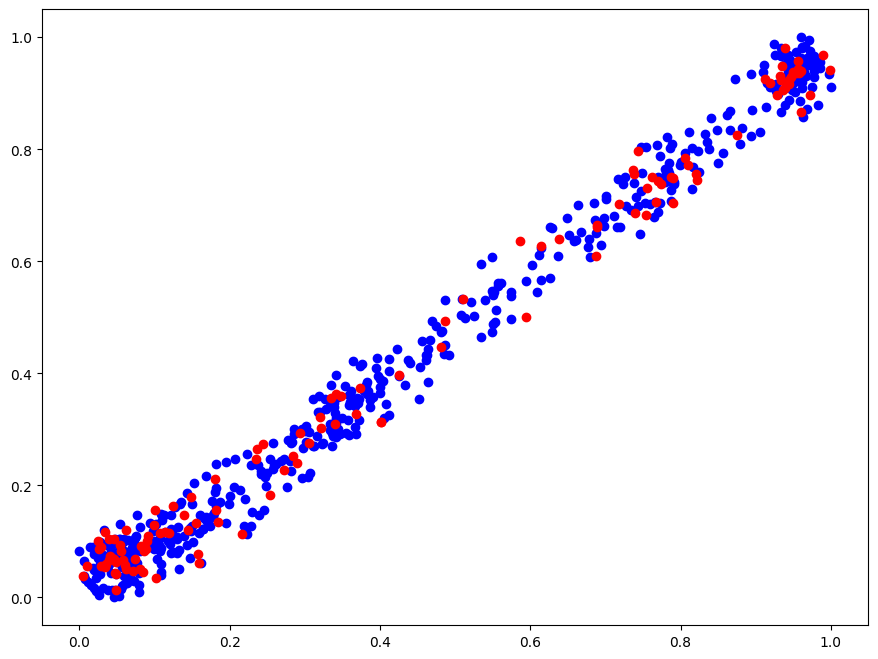

In [42]:
N = len(y_norm)

# 80% от всех данных - обучающая выборка
pointer = int(N*.8)
#print(pointer)

indx = np.arange(N)
np.random.shuffle(indx)

#print(indx)

X_train, y_train = X_norm[indx[:pointer]], y_norm[indx[:pointer]]
X_test,  y_test  = X_norm[indx[pointer:]], y_norm[indx[pointer:]]

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(X_train[:,0],y_train,c="blue")
plt.scatter(X_test[:,0],y_test,c="red")
plt.show()

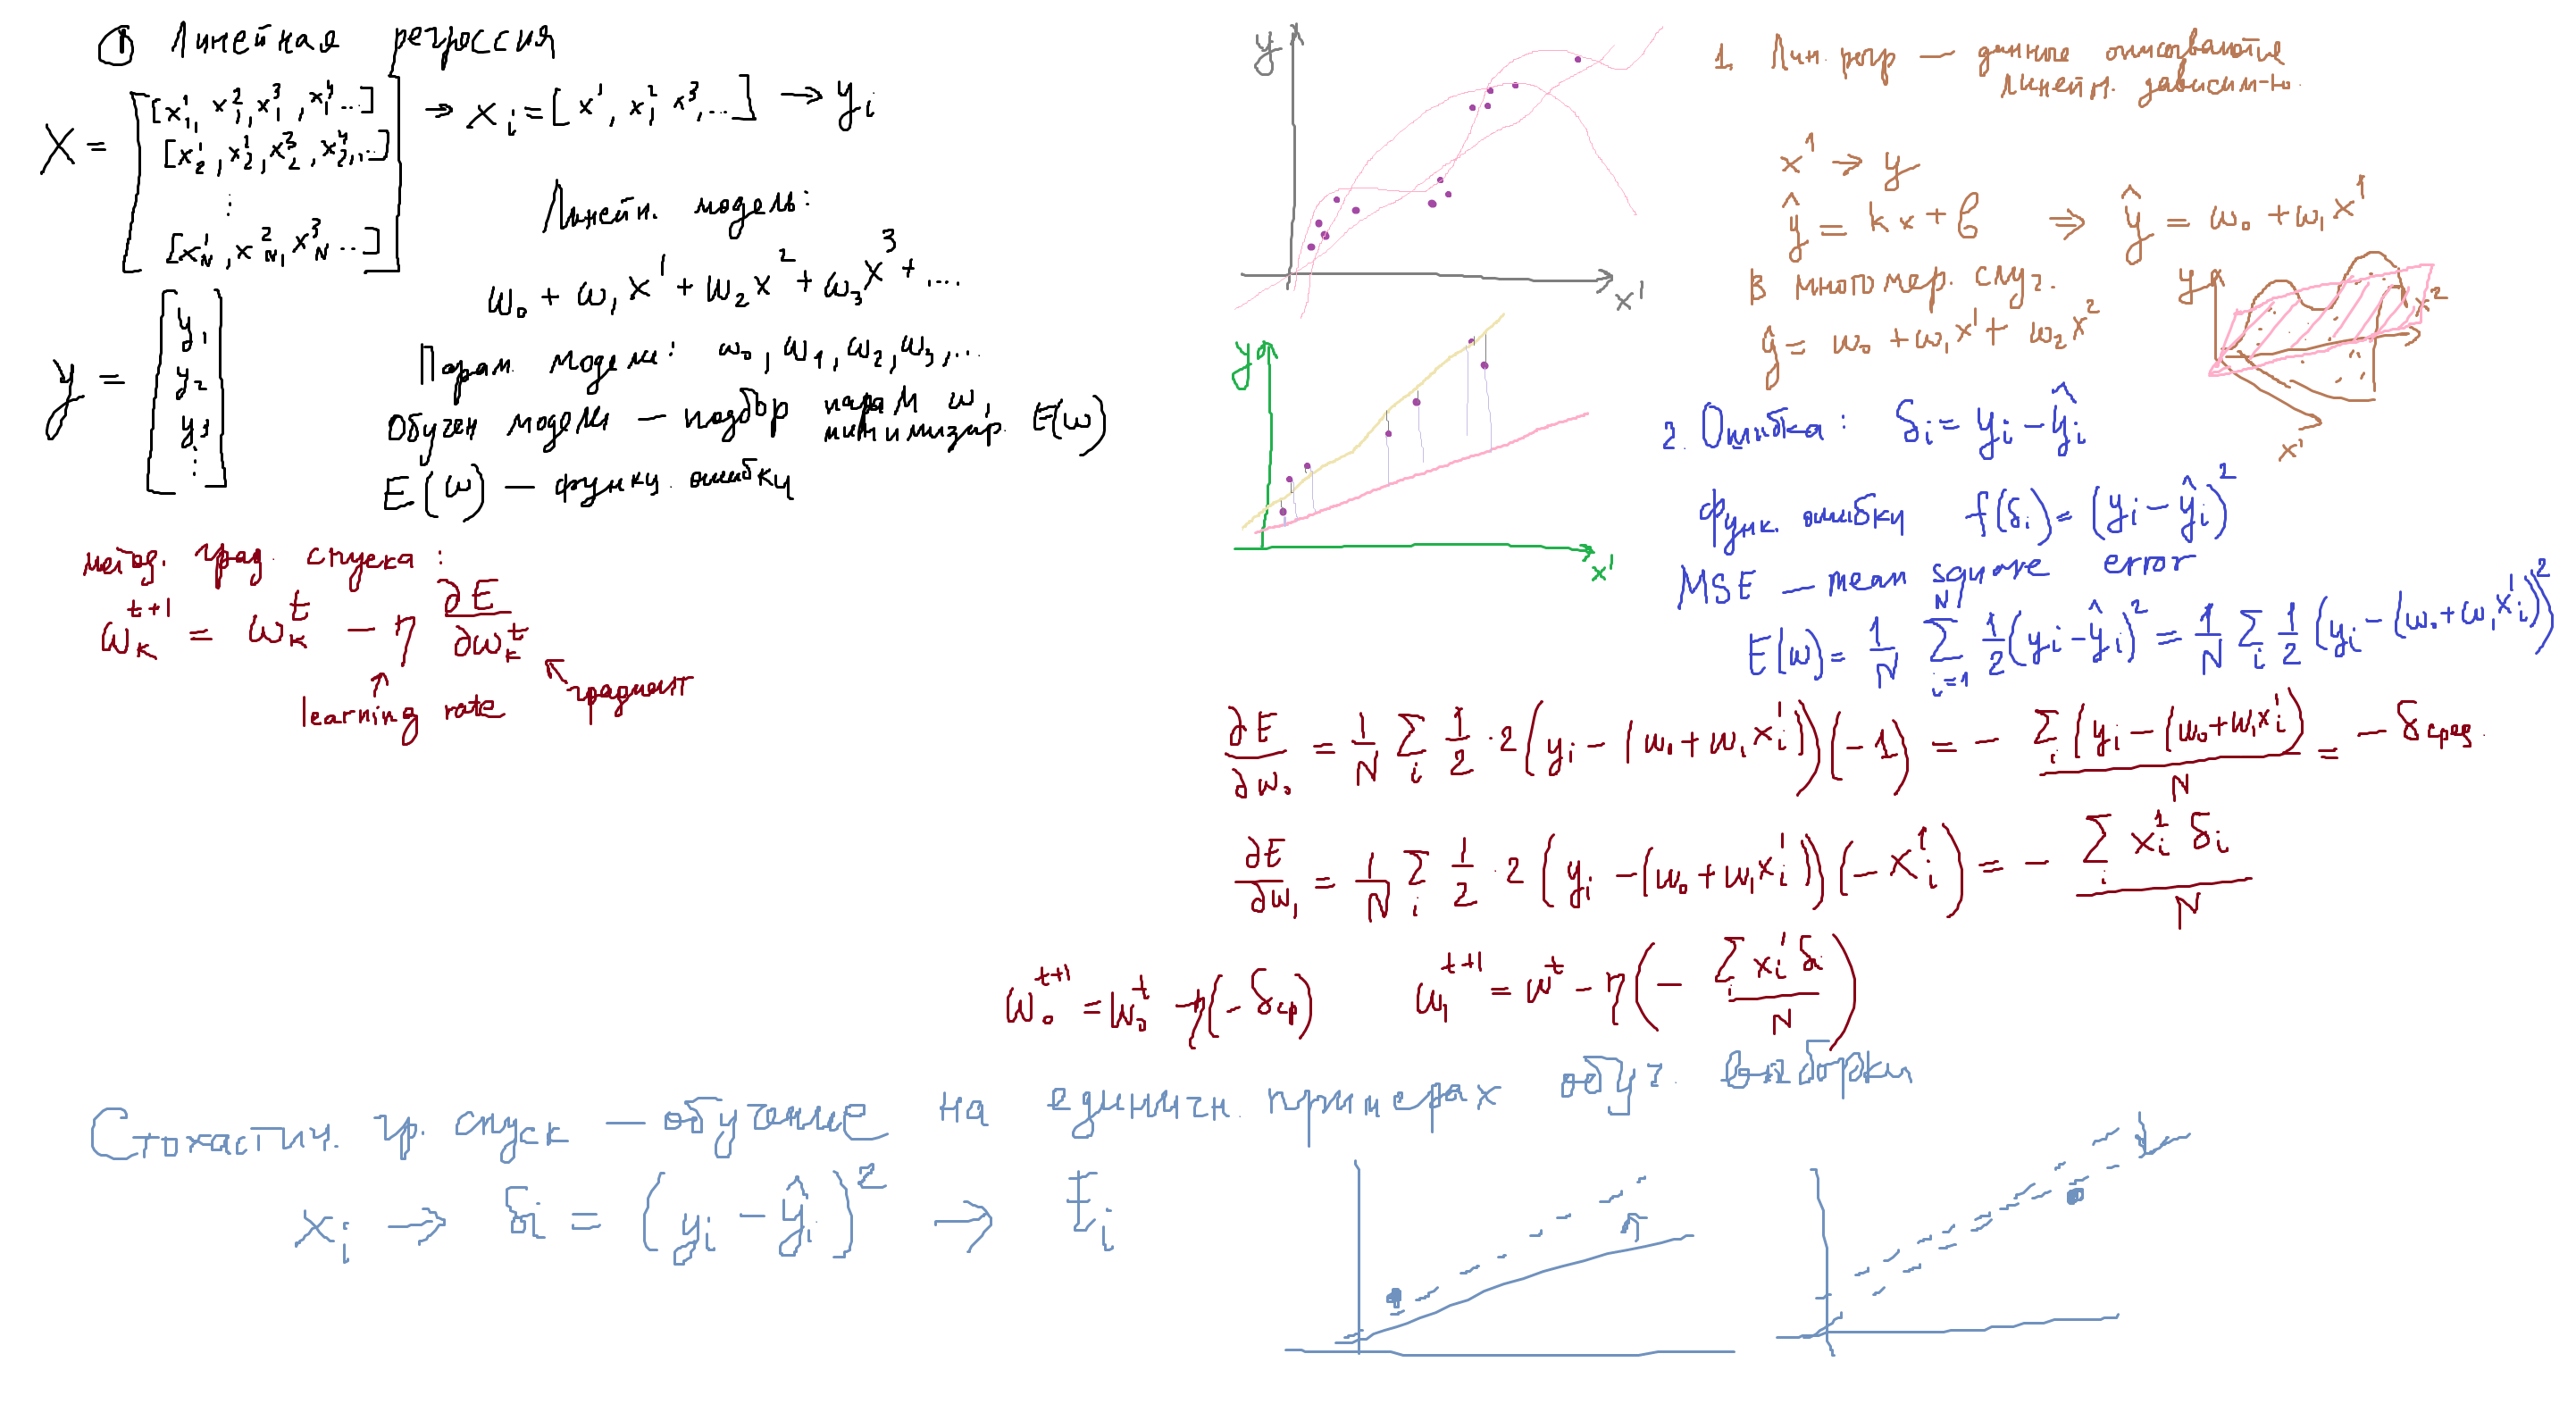

[0.0417963  0.88104858]


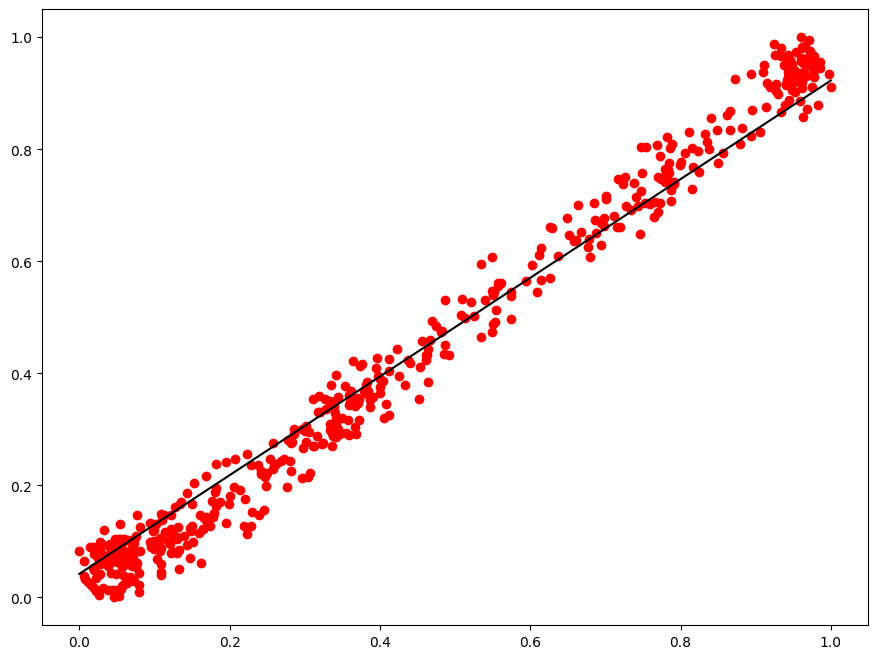

MSE: 0.001052144532617109


In [43]:
epochs = 1000
eta = .01

w = np.random.rand(2)

for epoch in range(epochs):
    dE_dw0, dE_dw1 = 0, 0
    for X,y in zip(X_train, y_train):
        y_hat = w[0] + w[1]*X[0]
        delta = y - y_hat
        dE_dw0 += delta
        dE_dw1 += delta*X[0]
    dE_dw0 = -dE_dw0/len(y_train)
    dE_dw1 = -dE_dw1/len(y_train)
    w[0] -= eta*dE_dw0
    w[1] -= eta*dE_dw1
    
print(w)

X_line = np.array([0, 1])
y_line = w[0] + w[1]*X_line

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(X_train, y_train, c='red')
plt.plot(X_line, y_line, c='black')
plt.show()

E = 0
for X,y in zip(X_test, y_test):
    y_hat = w[0] + w[1]*X[0]
    delta = y - y_hat
    E += .5*delta**2
E = E/len(y_test)
print('MSE:', E)

In [44]:
y_ = y_train.reshape((len(y_train),1))
#print(y_train, y_)

y_hat = X_train*w[1] + w[0]

delta = y_ - y_hat

dE_dw0 = -delta.mean()

print(dE_dw0)                     

0.0035959799957287174


## ДЗ (необязательное)

1. Написать свой класс для модели линейной регрессии.
2. Описать метод predict() для использования обученной модели.
3. Решить проблему масштабирования данных: для корректной работы алгоритма данные должны быть нормированы, но для дальнейшего прогнозирования данные должны подаваться в исходном не отмасштабированном виде.
4. Модель должна работать с данными любой размерности (любым количеством признаков).
5. Операции должны быть максимально векторизованы (то есть не нужно в цикле проходить по всем объектам, а нужно одновременно обрабатывать все в матричном виде).

In [108]:
def mse(a: np.ndarray, b: np.ndarray):
    return ((a - b) ** 2).sum() / a.shape[0]





class MyLinearRegression:
    def __init__(self, step=0.1, max_steps=1000, eps=1e-4):
        self._step = step
        self._max_steps = max_steps
        self._eps = eps
        self._weights = None


    def fit(self, x: np.ndarray, y: np.ndarray):
        x = self._prepare_initial(x)
        self._weights = np.random.randn(x.shape[1])
        old_mse = float('inf')
        for i in range(self._max_steps):
            prediction = self._predict_prepared(x)
            new_mse = mse(y, prediction)
            if abs(new_mse - old_mse) < self._eps:
                print(i)
                break
            old_mse = new_mse

            gradients = self._compute_gradients(x, y, prediction)
            #print(gradients)
            self._weights -= gradients * self._step
            #print(self._weights)

        return self


    def _compute_gradients(self, x: np.ndarray, y: np.ndarray, prediction: np.ndarray):
        return (-2 / x.shape[0]) * ((y - prediction) @ x)


    def predict(self, x: np.ndarray):
        x_normalized = self._prepare(x)
        return self._predict_prepared(x_normalized)


    def _predict_prepared(self, x: np.ndarray):
        return x @ self._weights


    @property
    def intercept_(self):
        return self._weights[-1]


    @property
    def coef_(self):
        return self._weights[:-1]


    # noinspection PyArgumentList
    def _normalize_initial(self, x: np.ndarray):
        columnwise_min = x.min(axis=0)
        columnwise_max = x.max(axis=0)
        columnwise_delta = columnwise_max - columnwise_min

        if columnwise_delta == 0:
            columnwise_delta = 1

        self._normalization_min = columnwise_min
        self._normalization_delta = columnwise_delta

        return self._normalize(x)


    def _normalize(self, x: np.ndarray):
        return (x - self._normalization_min) / self._normalization_delta


    def _prepare(self, x: np.ndarray):
        return np.column_stack([self._normalize(x), np.ones(x.shape[0])])


    def _prepare_initial(self, x: np.ndarray):
        return np.column_stack([self._normalize_initial(x), np.ones(x.shape[0])])


60070.153110771986
39043.41508412488
26742.210091931403
19487.466694474246
15153.520773940372
12512.14532950896
10853.58508442898
9767.621486797465
9017.089995747543
8464.808631917576
8031.363130964188
7670.718488979626
7356.12912525365
7071.998738887445
6809.177412023305
6562.244475984882
6327.938593281989
6104.250612360584
5889.899323839511
5684.028431622412
5486.0313295593705
5295.449719288529
5111.914892916607
4935.113669235911
4764.768577849187
4600.62627950745
4442.450749423015
4290.019216836056
4143.1197013507335
4001.549476026407
3865.1140699903253
3733.626586710906
3606.9072084594713
3484.7828120234662
3367.0866522450947
3253.6580881685413
3144.34233710344
3038.9902479968696
2937.4580890257544
2839.607346358987
2745.304532219753
2654.4210010647403
2566.8327730971396
2482.4203645651287
2401.068624436663
2322.6665771251437
2247.107270992105
2174.287632385996
2104.1083249981693
2036.473614332768
1971.291237099032
1908.472275344039
1847.9310351519666
1789.584929743145
1733.3543668

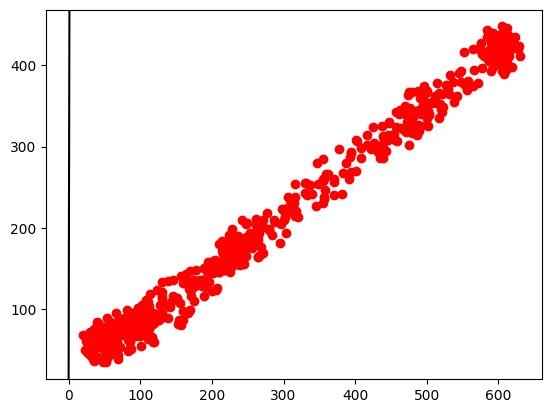

In [86]:
lr = MyLinearRegression().fit(data_x, data_y)
#print(lr.score(x, y))
print(lr.intercept_, lr.coef_)

plt.scatter(data_x, data_y, c='red')
plt.axline((0, lr.intercept_), slope=lr.coef_[0], c='black')

In [87]:
data_x[:10, :]

array([[44.81317307],
       [56.3543924 ],
       [44.86978004],
       [29.30051668],
       [48.88639123],
       [52.9982402 ],
       [35.0547275 ],
       [57.13230697],
       [54.21400881],
       [52.60910621]])

In [58]:
_prepare(data_x[:10, :])

array([[0.55737185, 1.        ],
       [0.97204942, 1.        ],
       [0.55940574, 1.        ],
       [0.        , 1.        ],
       [0.70372313, 1.        ],
       [0.85146242, 1.        ],
       [0.20674957, 1.        ],
       [1.        , 1.        ],
       [0.89514515, 1.        ],
       [0.83748078, 1.        ]])

In [73]:
mse(np.array([1, 1, 1]), np.array([3, 3, 3]))

4.0

In [94]:
lr2 = MyLinearRegression()
lr2._weights = np.array([3, 2])
x_local = np.array([[0, 1], [1, 1], [2, 1]])
y_local = np.array([1, 3, 5])
prediction = lr2._predict_prepared(x_local)
prediction

array([2, 5, 8])

In [95]:
lr2._compute_gradients(x_local, y_local, prediction)

array([5.33333333, 4.        ])

234
1.0846546173687135 [11.84545825]


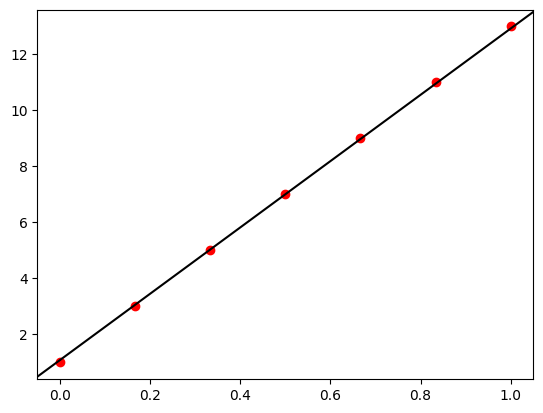

In [109]:
x1 = np.array([0, 1, 2, 3, 4, 5, 6])[:, None]
y1 = np.array([1, 3, 5, 7, 9, 11, 13])
lr = MyLinearRegression(step=0.1).fit(x1, y1)
#print(lr.score(x, y))
print(lr.intercept_, lr.coef_)

plt.scatter(lr._prepare(x1)[:, 0], y1, c='red')
plt.axline((0, lr.intercept_), slope=lr.coef_[0], c='black')